In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
d4 = np.genfromtxt('hor1dir6pix/HORI_pix_2212_d6_dist.dat',names=True)

In [3]:
psf = np.genfromtxt('elena_cats/HOROLOGIUM_CF.1.PSF.CAT',names=True)

In [16]:
iso=np.genfromtxt('/Users/hr8jz/Box Sync/Research/cmds/iso/fm220a1370.iso') #index 1 is F606?

In [17]:
iso[1]

array([0.50230041, 7.75461   , 7.95296   ])

In [13]:
iso[:,1]-iso[:,2]

array([-1.924300e-01, -1.983500e-01, -2.043800e-01, -2.104600e-01,
       -2.165800e-01, -2.227700e-01, -2.290000e-01, -2.352500e-01,
       -2.415300e-01, -2.478300e-01, -2.541200e-01, -2.604300e-01,
       -2.667000e-01, -2.729700e-01, -2.791800e-01, -2.853600e-01,
       -2.915000e-01, -2.975700e-01, -3.035900e-01, -3.095400e-01,
       -3.154400e-01, -3.213900e-01, -3.272800e-01, -3.330900e-01,
       -3.388200e-01, -3.444700e-01, -3.500400e-01, -3.555200e-01,
       -3.609100e-01, -3.661900e-01, -3.713500e-01, -3.764200e-01,
       -3.816100e-01, -3.864800e-01, -3.913000e-01, -3.960600e-01,
       -4.007600e-01, -4.053900e-01, -4.099500e-01, -4.144600e-01,
       -4.189000e-01, -4.233000e-01, -4.276300e-01, -4.319000e-01,
       -4.361400e-01, -4.403300e-01, -4.444600e-01, -4.485500e-01,
       -4.525900e-01, -4.565700e-01, -4.604800e-01, -4.643500e-01,
       -4.681400e-01, -4.719000e-01, -4.755900e-01, -4.792400e-01,
       -4.828200e-01, -4.863800e-01, -4.899100e-01, -4.933800e

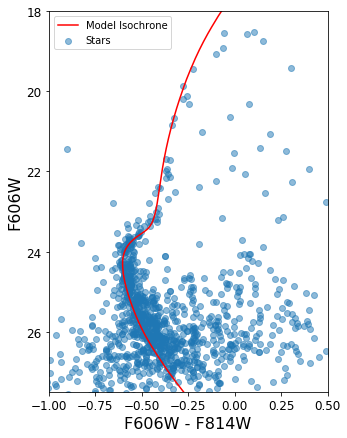

In [28]:
fig,ax = plt.subplots(figsize=(5,7))

# ax.scatter(psf['m606c']-psf['m814c'],psf['m814c'],alpha=0.5,label='PSF')
ax.scatter(d4['mean_f606w']-d4['mean_f814w'],d4['mean_f814w'],alpha=0.5,label='Stars')
ax.plot(iso[:,1]-iso[:,2],iso[:,1]+20.2,color='red',label='Model Isochrone')

ax.set_ylim(27.5,18)
ax.set_xlim(-1,0.5)
ax.set_xlabel('F606W - F814W',fontsize=16)
ax.set_ylabel('F606W',fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax.legend()

plt.savefig('images/isochrone.png')
# plt.show()

In [5]:
len(d4[d4['pos_std_f814w']<0.1])

162

In [6]:
keep = d4['mean_f814w']!=d4['mean_f814w']
for ll in range(len(d4)):
    temp_keep1 = np.logical_and(np.logical_and(d4['mean_f814w']>=21,d4['mean_f814w']<=24.5),
                             np.logical_and(d4['pos_std_f814w']<0.5,d4['stdev_f814w']<0.1))
    temp_keep = np.logical_and(temp_keep1,d4['mean_f606w']-d4['mean_f814w']<-0.3)
    keep = np.logical_or(keep,temp_keep)
    

In [7]:
len(d4['mean_f814w'][keep])

114

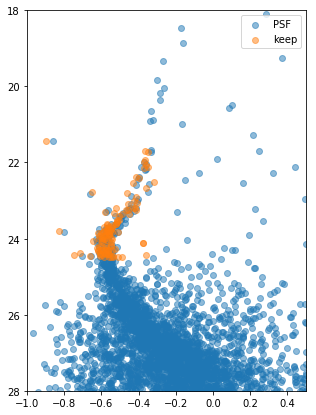

In [8]:
fig,ax = plt.subplots(figsize=(5,7))

ax.scatter(psf['m606c']-psf['m814c'],psf['m814c'],alpha=0.5,label='PSF')
# ax.scatter(d4['mean_f606w']-d4['mean_f814w'],d4['mean_f606w'],alpha=0.5,label='AP')
ax.scatter(d4['mean_f606w'][keep]-d4['mean_f814w'][keep],
           d4['mean_f814w'][keep],alpha=0.5,label='keep')


ax.set_ylim(28,18)
ax.set_xlim(-1,0.5)
ax.legend()

plt.show()

In [15]:
gen_keep = d4[keep]

# mean2_1 = d4['mag2_f606w'][keep]-d4['mag1_f606w'][keep]

In [26]:
len(gen_keep[abs(gen_keep['cut_idx_f814w']-0) <= 1e-3])

6

In [27]:
len(gen_keep[abs(gen_keep['cut_idx_f814w']-1) <= 1e-3])

9

In [28]:
len(gen_keep[abs(gen_keep['cut_idx_f814w']-2) <= 1e-3])

29

In [29]:
len(gen_keep[abs(gen_keep['cut_idx_f814w']-3) <= 1e-3])

11

In [31]:
len(gen_keep[abs(gen_keep['cut_idx_f814w']-4) <= 1e-3])

3

In [32]:
keeper = gen_keep['mean_f814w']!=gen_keep['mean_f814w']
keep_2 = np.logical_and(abs(gen_keep['cut_idx_f814w']-0) >= 1e-3,
                       abs(gen_keep['cut_idx_f814w']-1) >= 1e-3)
keep2 = np.logical_or(keeper,keep_2)

In [33]:
keep_3 = np.logical_and(abs(gen_keep['cut_idx_f814w']-0) >= 1e-3,
                       abs(gen_keep['cut_idx_f814w']-2) >= 1e-3)
keep3 = np.logical_or(keeper,keep_3)

In [34]:
keep_4 = np.logical_and(abs(gen_keep['cut_idx_f814w']-0) >= 1e-3,
                       abs(gen_keep['cut_idx_f814w']-3) >= 1e-3)
keep4 = np.logical_or(keeper,keep_4)

In [35]:
keep_a = np.logical_and(abs(gen_keep['cut_idx_f814w']-0) >= 1e-3,
                       abs(gen_keep['cut_idx_f814w']-4) >= 1e-3)
keepa = np.logical_or(keeper,keep_a)

In [36]:
mean2_1 = np.mean(gen_keep['mag1_f814w'][keep2]-gen_keep['mag2_f814w'][keep2])
print(mean2_1)

0.010568604651162822


In [37]:
mean3_1 = np.mean(gen_keep['mag1_f814w'][keep3]-gen_keep['mag3_f814w'][keep3])
print(mean3_1)

-0.01089347826087005


In [38]:
mean4_1 = np.mean(gen_keep['mag1_f814w'][keep4]-gen_keep['mag4_f814w'][keep4])
print(mean4_1)

0.008167560975609637
